# Tutorial #2 - Preprocessing options

## Load the PyEEM library and display version

In [1]:
import pyeem
print(pyeem.__version__)

0.1.1


## Check out the supported instruments

In [2]:
pyeem.instruments.supported

name
manufacturer supported_models              
Agilent      Cary 4E                cary_4e
             Cary Eclipse      cary_eclipse
Horiba       Aqualog-880-C          aqualog
             SPEX Fluorolog-3     fluorolog
Tecan        Spark                    spark

## Check out the demo datasets

In [3]:
demos_df = pyeem.datasets.demos
display(demos_df)

print("Dataset description for the drEEM demo:")
print(demos_df[
    demos_df["demo_name"] == "drEEM"
]["description"].item())

,demo_name,description,citation,DOI,absorbance_instrument,water_raman_instrument,EEM_instrument
0,rutherford,Excitation Emission Matrix (EEM) fluorescence ...,"Rutherford, Jay W., et al. ""Excitation emissio...",10.1016/j.atmosenv.2019.117065,Aqualog,None,Aqualog
1,drEEM,The demo dataset contains measurements made du...,"Murphy, Kathleen R., et al. ""Fluorescence spec...",10.1039/c3ay41160e,Cary 4E,Fluorolog,Fluorolog


Dataset description for the drEEM demo:
The demo dataset contains measurements made during four surveys of San Francisco Bay that took place in spring, summer, autumn and winter 2006 (Murphy et al. 2013, J. Mar. Syst. 111-112, 157-166).


## Download the drEEM demo dataset from S3
- Please note that this step requires an internet connection because the data is downloaded from an AWS S3 bucket.

In [4]:
demo_data_dir = pyeem.datasets.download_demo(
    "demo_data",
    demo_name="drEEM"
)

Download Demo Dataset from S3: 100%|██████████| 260/260 [00:00<00:00, 163031.70it/s]


## Load the dataset

In [5]:
demo_data_dir = "demo_data/drEEM"

dataset = pyeem.datasets.Dataset(
    data_dir=demo_data_dir,
    raman_instrument="fluorolog",
    absorbance_instrument="cary_4e",
    eem_instrument="fluorolog",
    mode="w"
)

## Let's checkout the metadata
- The metadata contains information about collected sample sets which are composed of a few different scan types.

In [6]:
display(dataset.meta_df)

datetime_utc          filename collected_by  \
sample_set scan_type                                                        
1          water_raman 2006-04-27 00:00:00  water_raman1.csv         Anon   
           blank_eem   2006-04-27 11:59:30    blank_eem1.csv         Anon   
           absorb      2006-04-27 23:59:00       absorb1.csv         Anon   
2          water_raman 2006-04-28 00:00:00  water_raman1.csv         Anon   
           blank_eem   2006-04-28 05:59:45    blank_eem1.csv         Anon   
...                                    ...               ...          ...   
15         absorb      2006-09-14 23:59:00      absorb11.csv         Anon   
16         water_raman 2006-09-15 00:00:00  water_raman1.csv         Anon   
           blank_eem   2006-09-15 07:59:40    blank_eem1.csv         Anon   
           sample_eem  2006-09-15 15:59:20   sample_eem1.csv         Anon   
           absorb      2006-09-15 23:59:00       absorb1.csv         Anon   

                       description comments  water_raman_wavelength  \
sample_set scan_type                                                  
1          water_raman                                        275.0   
           blank_eem                                            NaN   
           absorb                                               NaN   
2          water_raman                                        275.0   
           blank_eem                                            NaN   
...                            ...      ...                     ...   
15         absorb                                               NaN   
16         water_raman                                        275.0   
           blank_eem                                            NaN   
           sample_eem                                           NaN   
           absorb                                               NaN   

                        dilution_factor    cruise Site  Rep  SampID  \
sample_set scan_type                                                  
1          water_raman              1.0  SF-p-win   1B  3.0   478.0   
           blank_eem                1.0  SF-p-win   1B  3.0   478.0   
           absorb                   1.0  SF-p-win   1B  3.0   478.0   
2          water_raman              1.0  SF-p-win   1B  2.0   477.0   
           blank_eem                1.0  SF-p-win   1B  2.0   477.0   
...                                 ...       ...  ...  ...     ...   
15         absorb                   1.0  SF-p-win   3A  3.0   493.0   
16         water_raman              1.0  SF-p-win   3A  1.0   491.0   
           blank_eem                1.0  SF-p-win   3A  1.0   491.0   
           sample_eem               1.0  SF-p-win   3A  1.0   491.0   
           absorb                   1.0  SF-p-win   3A  1.0   491.0   

                                                                 filepath  \
sample_set scan_type                                                        
1          water_raman  /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
           blank_eem    /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
           absorb       /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
2          water_raman  /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
           blank_eem    /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
...                                                                   ...   
15         absorb       /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
16         water_raman  /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
           blank_eem    /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
           sample_eem   /home/roboat/Documents/roboat/PyEEM/docs/sourc...   
           absorb       /home/roboat/Documents/roboat/PyEEM/docs/sourc...   

                                name                         hdf_path  
sample_set scan_type                                                   
1          water_raman  water_rama

## Checkout the metadata summary information

In [7]:
dataset.metadata_summary_info()

,Start datetime (UTC),End datetime (UTC),Number of sample sets,Number of blank EEMs,Number of sample EEMs,Number of water raman scans,Number of absorbance scans
0,2006-04-27,2006-09-15 23:59:00,16,16,73,16,77


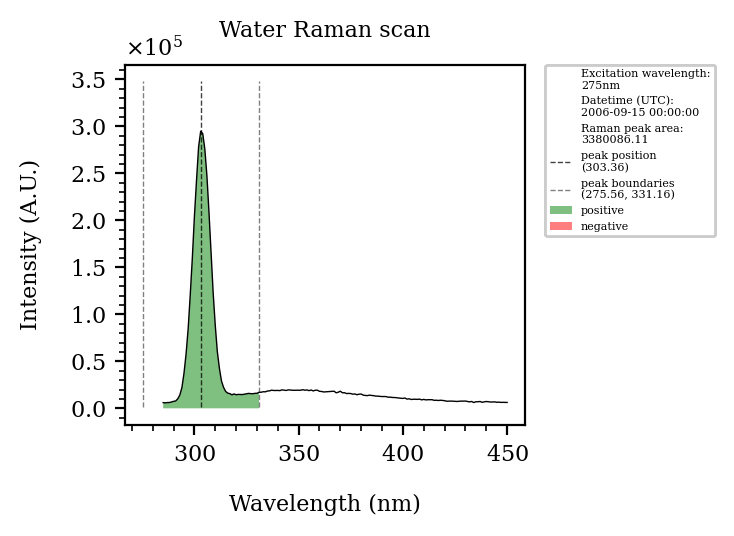

In [8]:
from IPython.display import HTML
fig_kws = {"dpi": 200}
anim = pyeem.plots.water_raman_peak_animation(dataset, excitation_wavelength=275, fig_kws=fig_kws)
HTML(anim.to_html5_video())

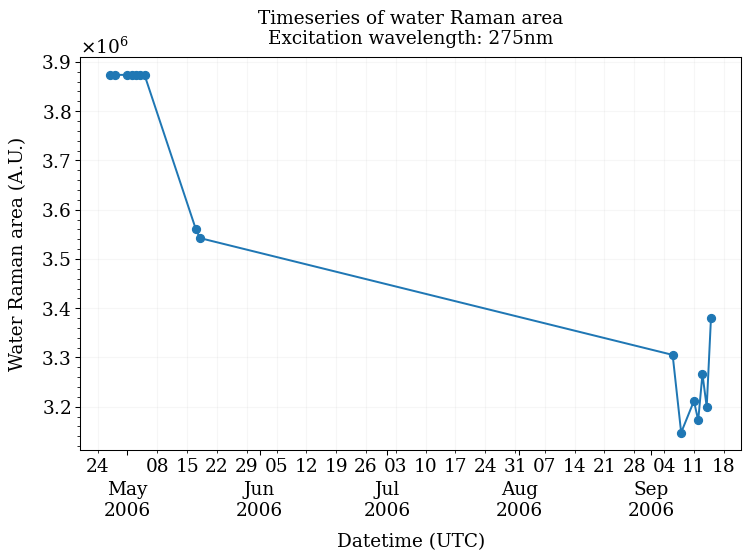

In [9]:
import matplotlib.pyplot as plt
fig_kws={"dpi": 95}
plot_kws = {"fmt": "o-"}
kwargs = {"byweekday": 0}
ax = pyeem.plots.water_raman_timeseries(
    dataset,
    excitation_wavelength=275,
    fig_kws=fig_kws,
    plot_kws=plot_kws,
    **kwargs
)
plt.show()

## Create a preprocessing routine
- The demo dataset contains raw scans, in order to analyze and interpret this data, we must first apply several preprocessing steps.

In [10]:
routine_df = pyeem.preprocessing.create_routine(
    crop = False,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = True,
    raman_normalization = True,
    scatter_removal = True,
    dilution = False,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,blank_subtraction,preprocessing/corrections/blank_subtraction
2,inner_filter_effect,preprocessing/corrections/inner_filter_effect
3,raman_normalization,preprocessing/corrections/raman_normalization
4,scatter_removal,preprocessing/corrections/scatter_removal
5,complete,preprocessing/complete/


## Execute the preprocessing routine
- Each preprocessing step has certain knobs and dials you can tune to have them run to your liking. It is worth checking the documentation to learn more about these customizations.
- Please note that depending on the steps and settings you've chosen as well as your dataset's size, the time it takes for this step to complete will vary.

In [11]:
kwargs = {
    "raman_source_type": "water_raman",
    "water_raman_wavelength": 275,
    "excision_width": 30,
    "fill": "interp",
}


routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    progress_bar=True,
    **kwargs
)

display(routine_results_df)

Preprocessing scan sets: 100%|██████████| 16/16 [00:38<00:00,  2.43s/it]


step_completed  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           True   
2          blank_eem  blank_eem1  raw                           True   
           sample_eem sample_eem1 raw                           True   
                                  blank_subtraction             True   
                                  inner_filter_effect           True   
...                                                              ...   
16         sample_eem sample_eem1 blank_subtraction             True   
                                  inner_filter_effect           True   
                                  raman_normalization           True   
                                  scatter_removal               True   
                                  complete                      True   

                                                      step_exception  \
sample_set scan_type  name        step_name                            
1          blank_eem  blank_eem1  raw                           None   
2          blank_eem  blank_eem1  raw                           None   
           sample_eem sample_eem1 raw                           None   
                                  blank_subtraction             None   
                                  inner_filter_effect           None   
...                                                              ...   
16         sample_eem sample_eem1 blank_subtraction             None   
                                  inner_filter_effect           None   
                                  raman_normalization           None   
                                  scatter_removal               None   
                                  complete                      None   

                                                                                                hdf_path  \
sample_set scan_type  name        step_name                                                                
1          blank_eem  blank_eem1  raw                                       raw_sample_sets/1/blank_eem1   
2          blank_eem  blank_eem1  raw                                       raw_sample_sets/2/blank_eem1   
           sample_eem sample_eem1 raw                                      raw_sample_sets/2/sample_eem1   
                                  blank_subtraction    preprocessing/corrections/blank_subtraction/2/...   
                                  inner_filter_effect  preprocessing/corrections/inner_filter_effect/...   
...                                                                                                  ...   
16         sample_eem sample_eem1 blank_subtraction    preprocessing/corrections/blank_subtraction/16...   
                                  inner_filter_effect  preprocessing/corrections/inner_filter_effect/...   
                                  raman_normalization  preprocessing/corrections/raman_normalization/...   
                                  scatter_removal      preprocessing/corrections/scatter_removal/16/s...   
                                  complete                         preprocessing/complete/16/sample_eem1   

                                                               units  
sample_set scan_type  name        step_name                           
1          blank_eem  blank_eem1  raw                  Intensity, AU  
2          blank_eem  blank_eem1  raw                  Intensity, AU  
           sample_eem sample_eem1 raw                  Intensity, AU  
                                  blank_subtraction    Intensity, AU  
                                  inner_filter_effect  Intensity, AU  
...                                                              ...  
16         sample_eem sample_eem1 blank_subtraction    Intensity, AU  
                                  inner_filter_effect  Intensity, AU  
                                  raman_normalization  Intensity,

## Check to see if any of the steps failed to complete
- If you are using a demo dataset, you should see an empty dataframe.

In [12]:
display(routine_results_df[
    routine_results_df["step_exception"].notna()
])

,,,,step_completed,step_exception,hdf_path,units
sample_set,scan_type,name,step_name,,,,
8,sample_eem,sample_eem2,inner_filter_effect,False,'No object named raw_sample_sets/8/absorb2 in ...,None,None


## Visualize the preprocessing steps for a single sample

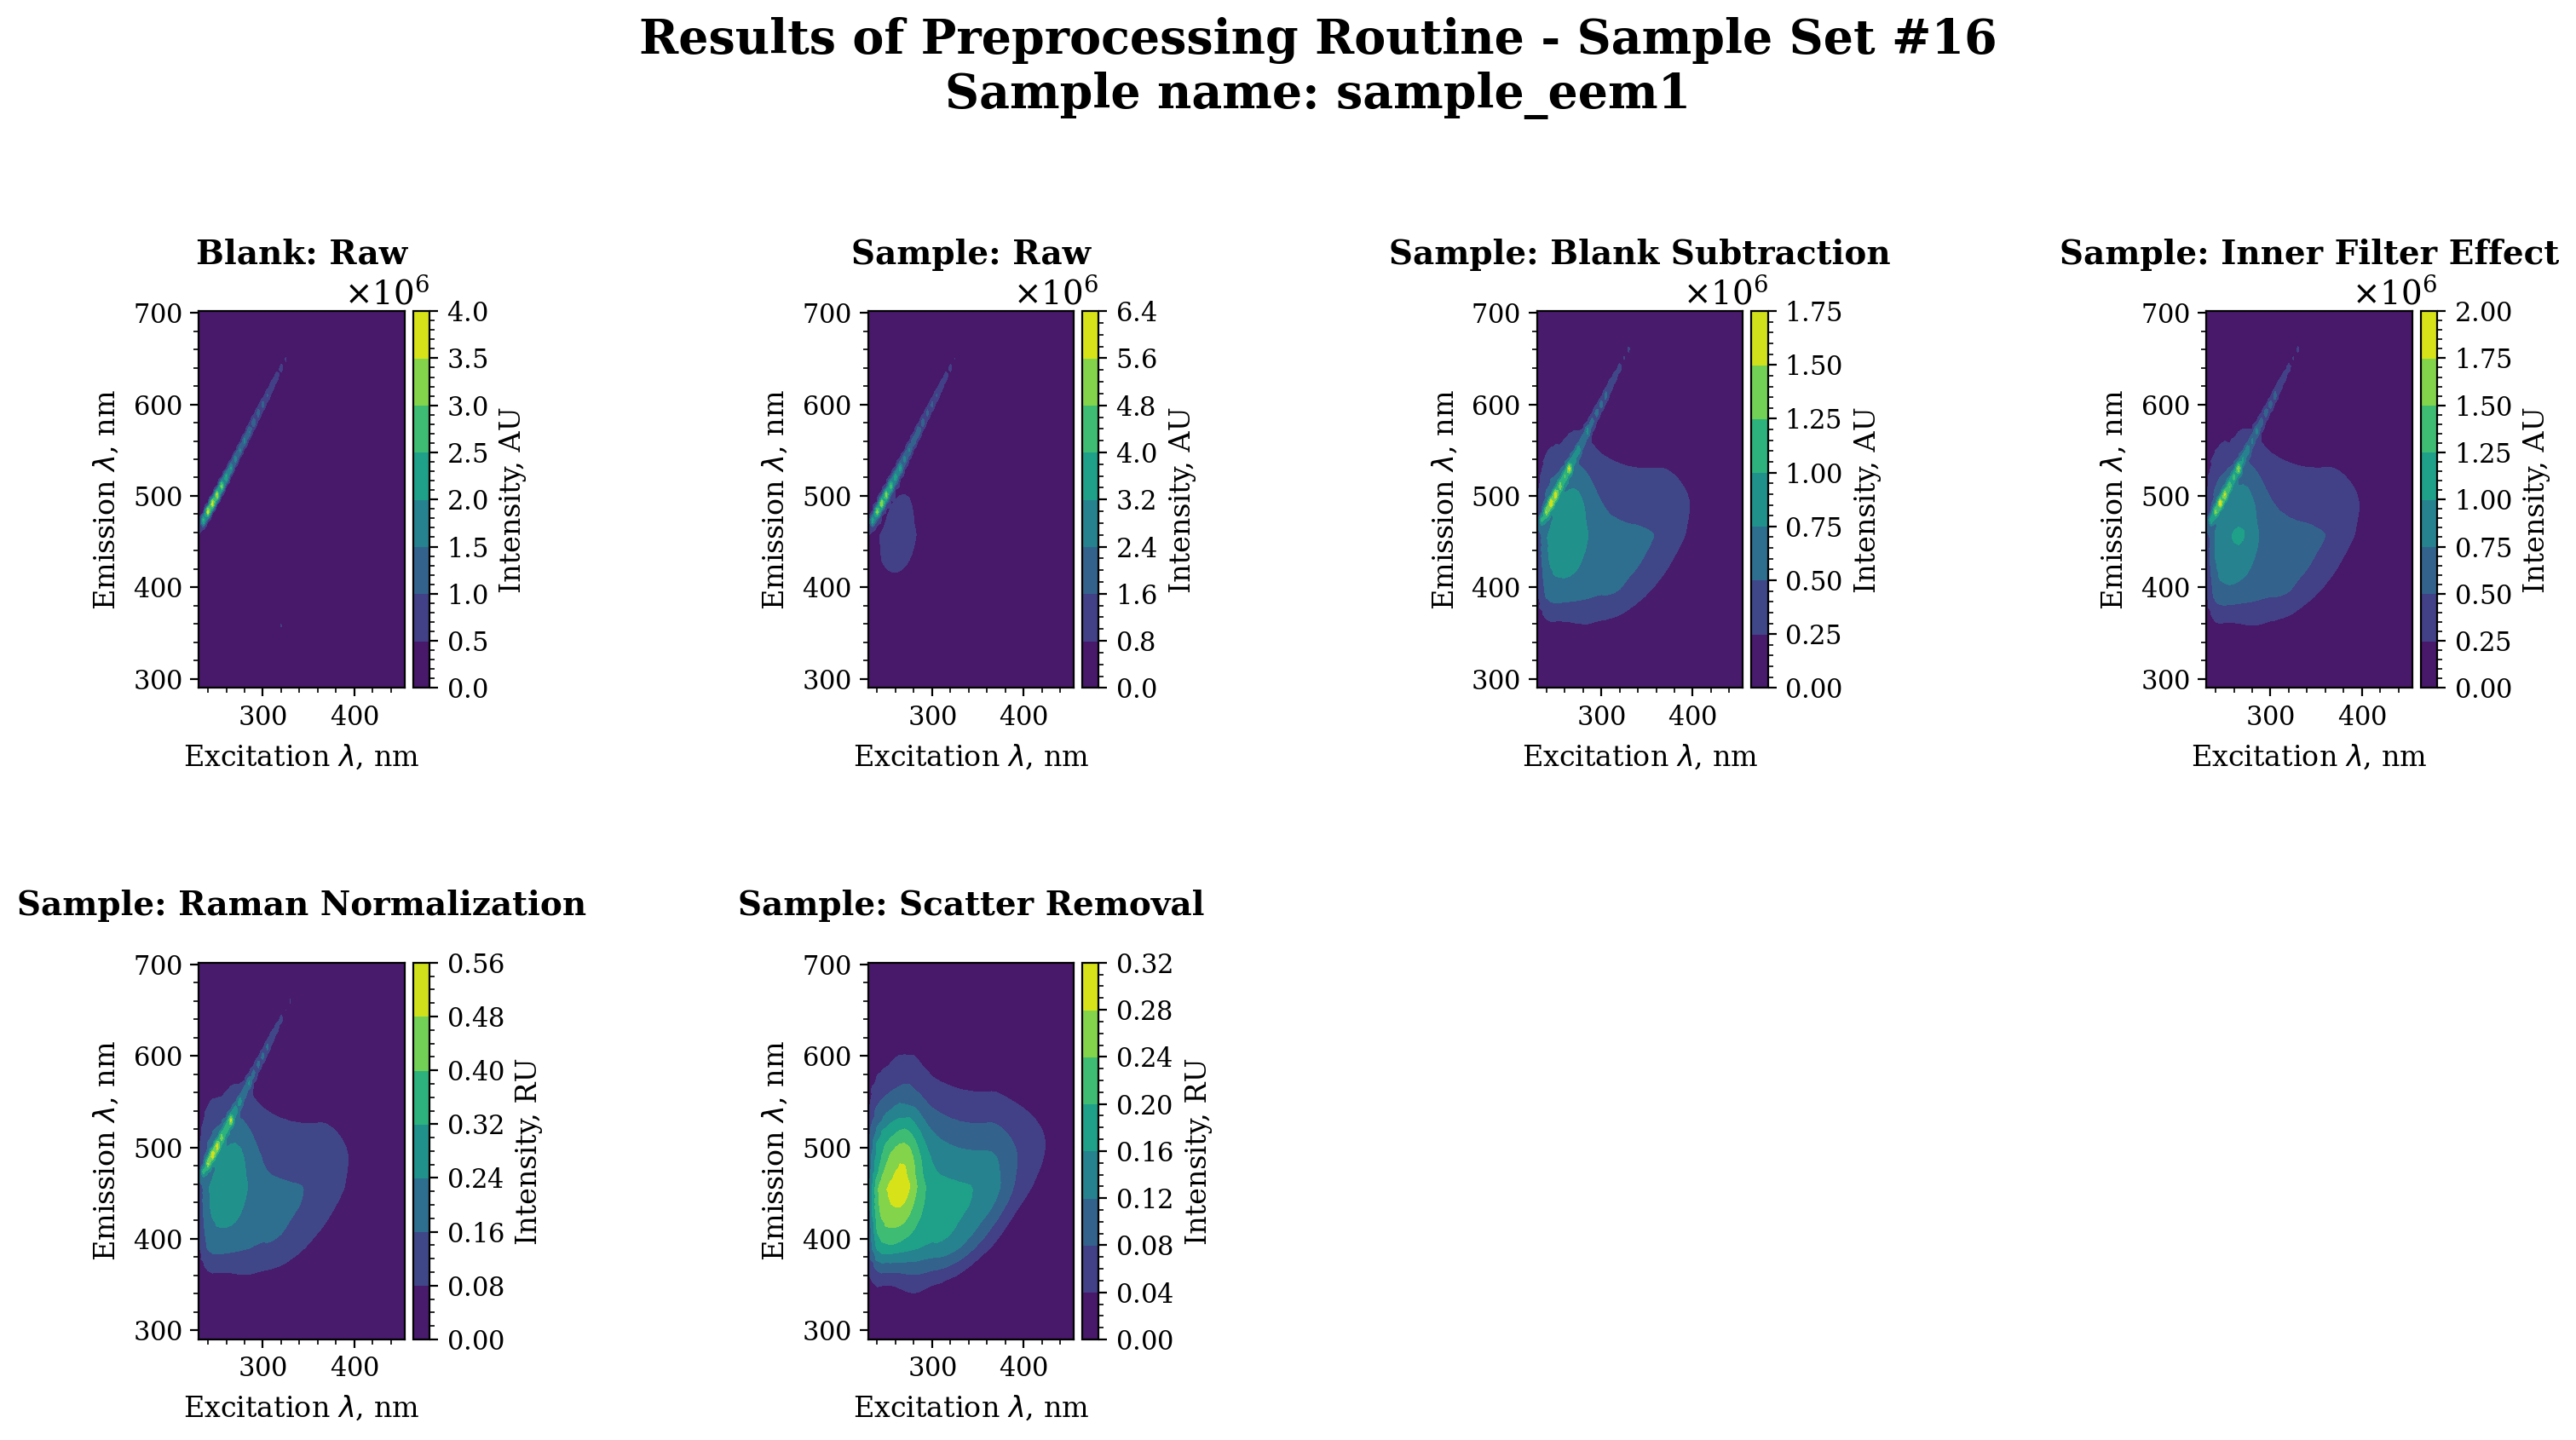

In [13]:
import matplotlib.pyplot as plt

sample_set = 16
sample_name = "sample_eem1"
axes = pyeem.plots.preprocessing_routine_plot(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

In [14]:
routine_df = pyeem.preprocessing.create_routine(
    crop = False,
    discrete_wavelengths = False,
    gaussian_smoothing = False,
    blank_subtraction = True,
    inner_filter_effect = False,
    raman_normalization = False,
    scatter_removal = True,
    dilution = False,
)

display(routine_df)

,step_name,hdf_path
step_order,,
0,raw,raw_sample_sets/
1,blank_subtraction,preprocessing/corrections/blank_subtraction
2,scatter_removal,preprocessing/corrections/scatter_removal
3,complete,preprocessing/complete/


Preprocessing scan sets: 100%|██████████| 16/16 [00:03<00:00,  4.09it/s]


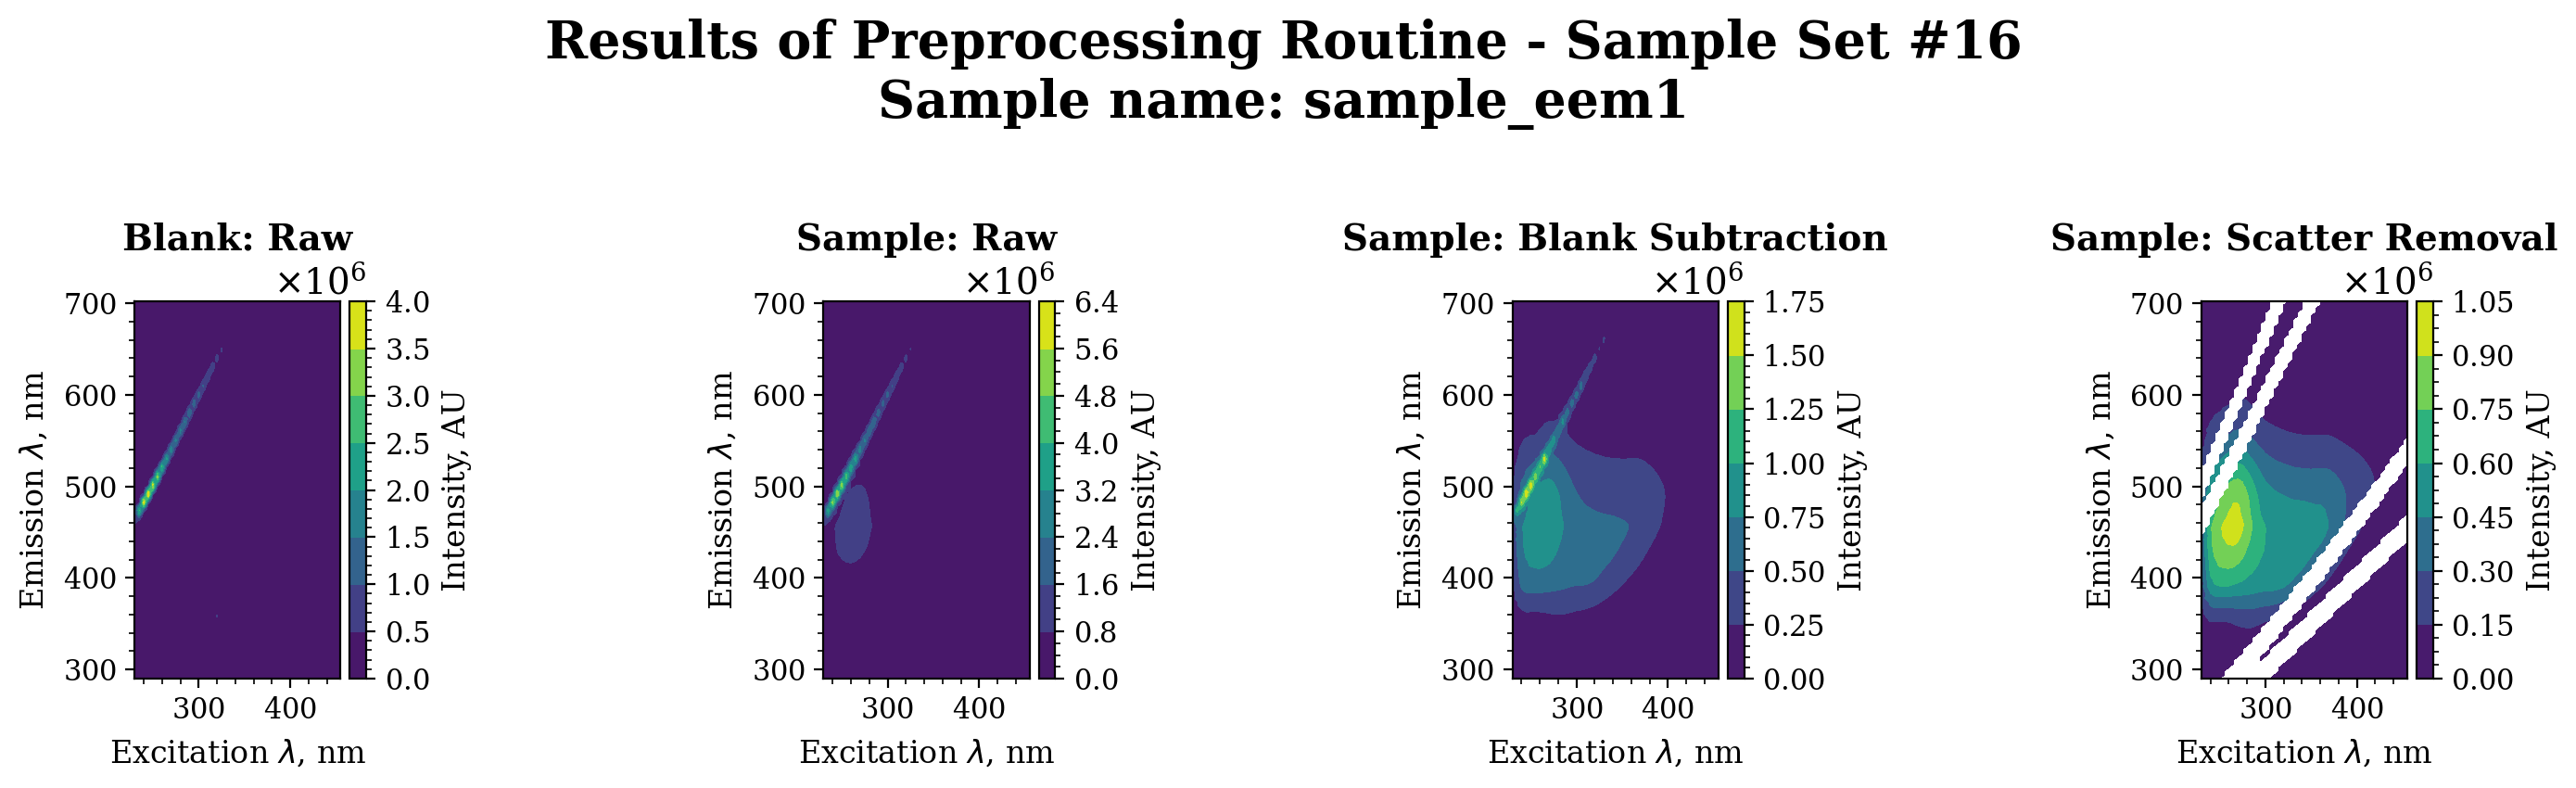

In [15]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    fill = None,
    excision_width = 25,
    progress_bar=True
)

axes = pyeem.plots.preprocessing_routine_plot(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

Preprocessing scan sets: 100%|██████████| 16/16 [00:03<00:00,  4.21it/s]


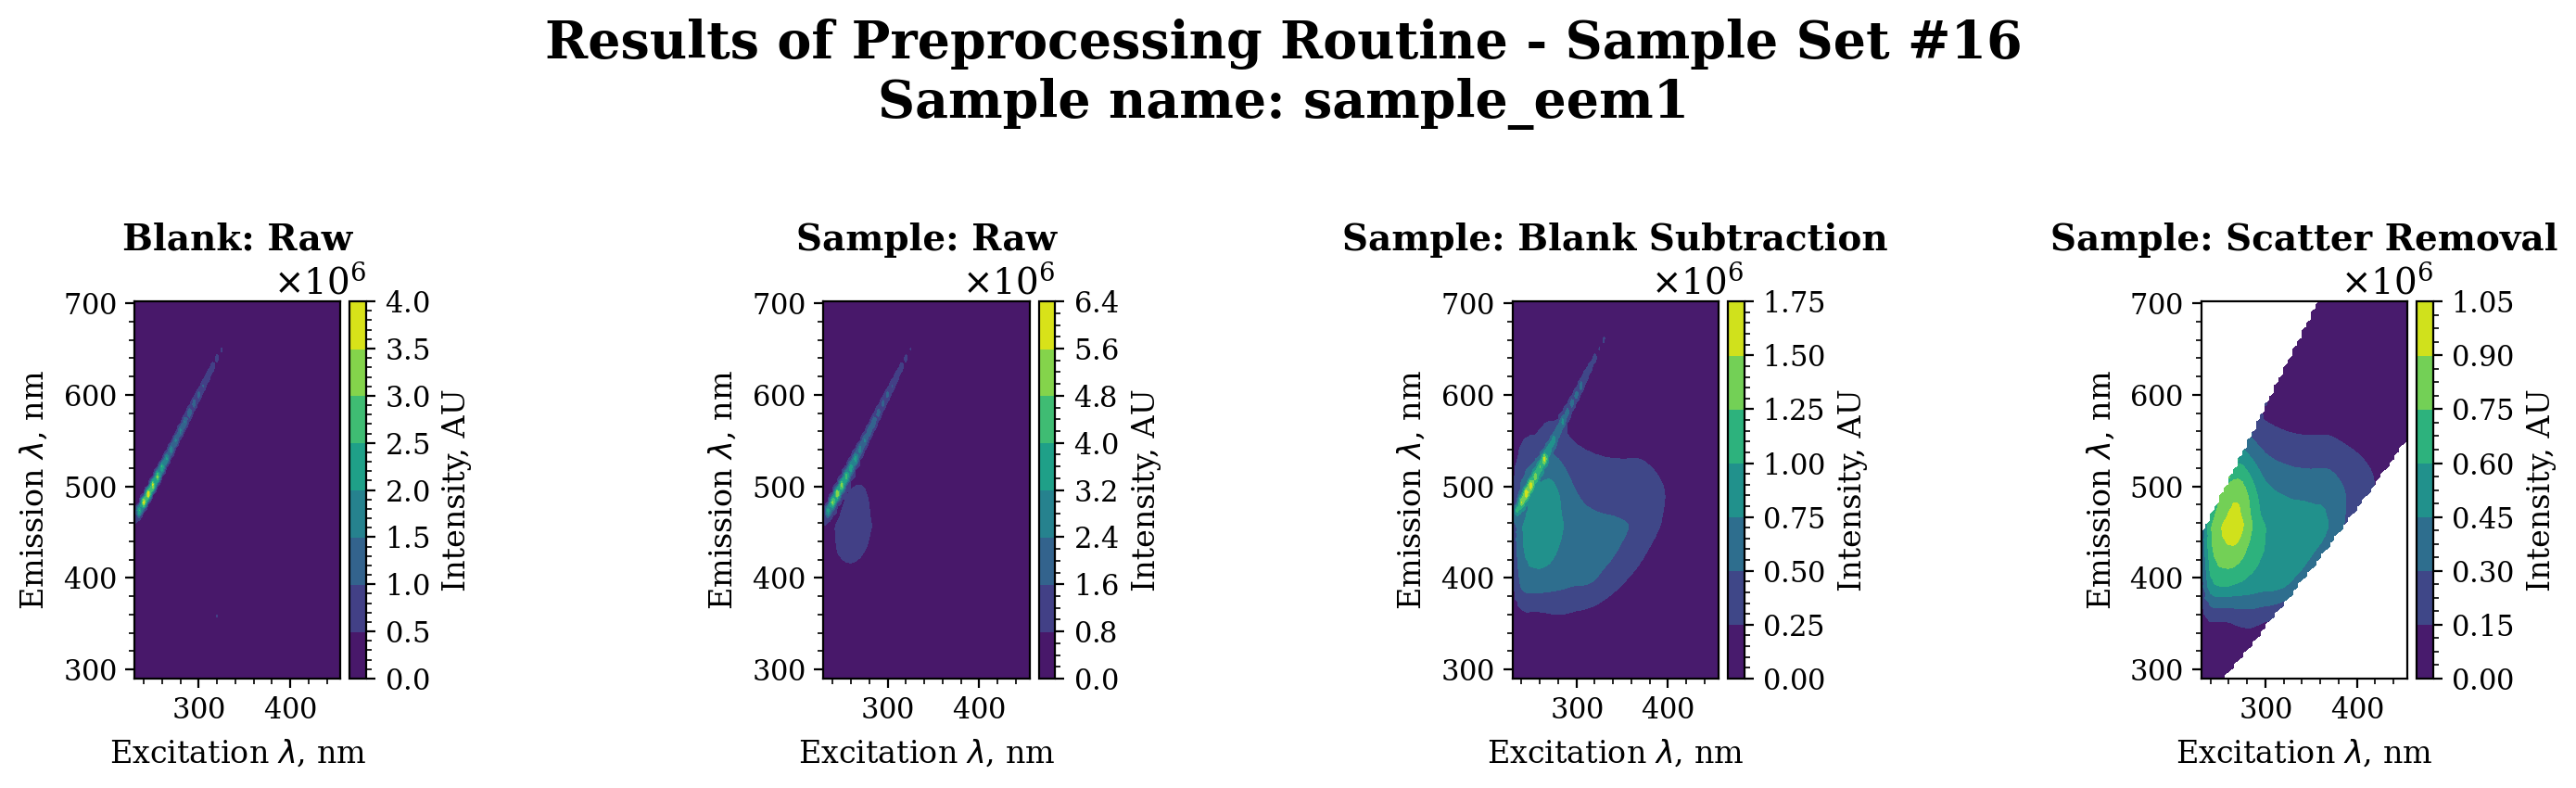

In [16]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = None,
    truncate = "both",
    progress_bar=True
)

axes = pyeem.plots.preprocessing_routine_plot(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

Preprocessing scan sets: 100%|██████████| 16/16 [00:03<00:00,  4.09it/s]


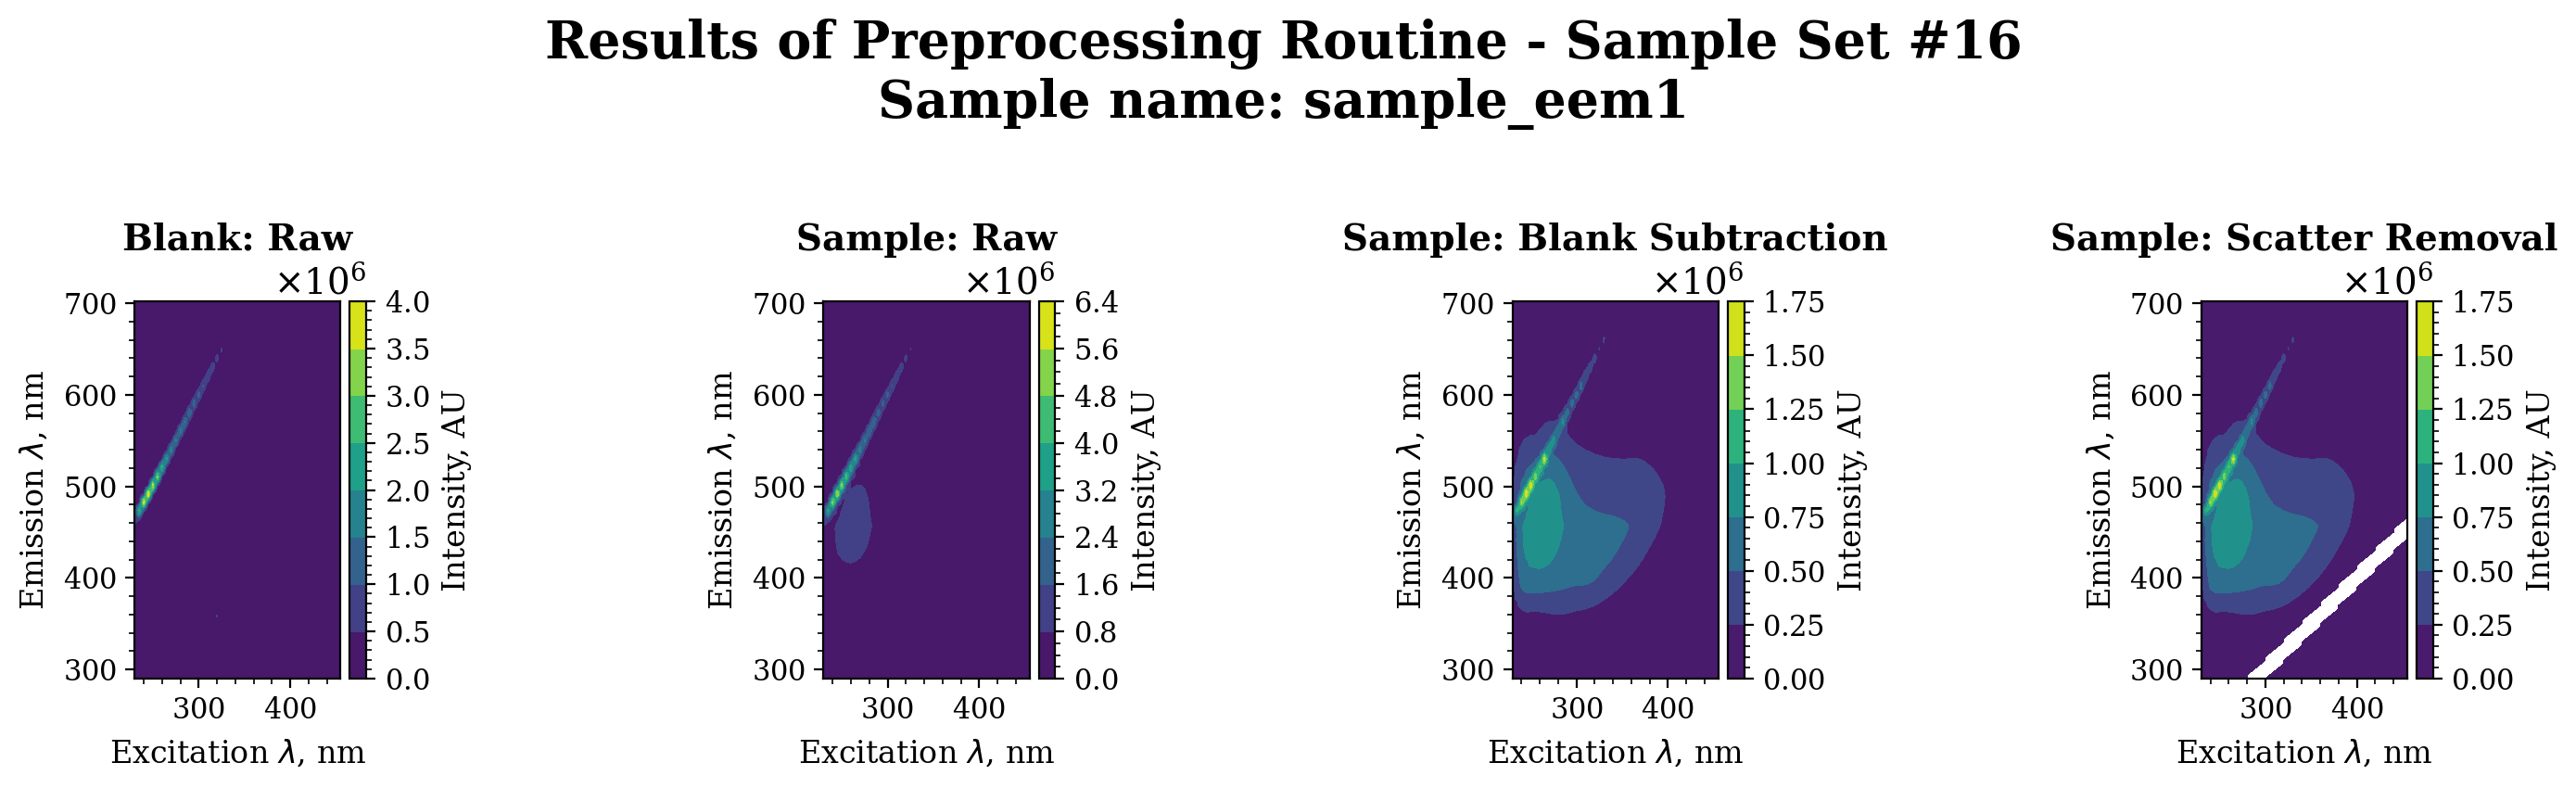

In [17]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = None,
    band="rayleigh",
    order="first",
    excision_width=20,
    progress_bar=True
)

axes = pyeem.plots.preprocessing_routine_plot(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="contour",
    fig_kws={"dpi": 200},
)
plt.show()

Preprocessing scan sets: 100%|██████████| 16/16 [00:08<00:00,  1.97it/s]


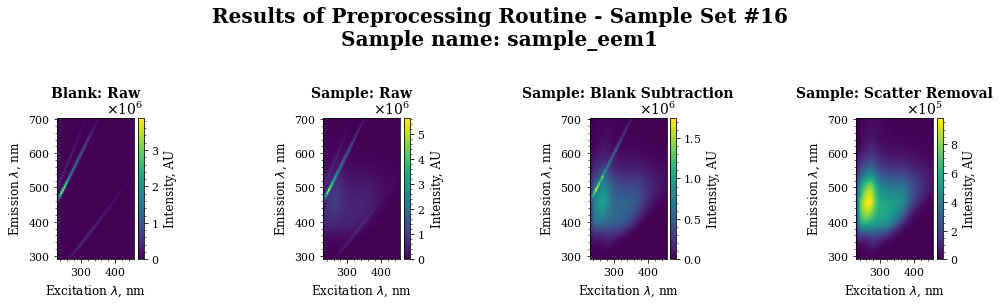

In [18]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = "interp",
    band="both",
    excision_width = 25,
    progress_bar=True
)

axes = pyeem.plots.preprocessing_routine_plot(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="imshow",
)
plt.show()

In [ ]:
routine_results_df = pyeem.preprocessing.perform_routine(
    dataset,
    routine_df,
    raman_source_type = "water_raman",
    fill = None,
    band="rayleigh",
    order="first",
    truncate="below",
    excision_width = 25,
    progress_bar=True
)

axes = pyeem.plots.preprocessing_routine_plot(
    dataset,
    routine_results_df,
    sample_set=sample_set,
    sample_name=sample_name,
    plot_type="imshow",
)
plt.show()